IP-Experiment no. 03 : IMAGE ENHANCEMENT

C035
Krisha Goti

Aim: <br>
a. For the given test image, apply power law transformation with gamma <br>
b.For the given low contrast image, apply thresholding and contrast stretching point processing techniques to enhance the image.

## Power-law (gamma) transformations can be mathematically expressed as $s = cr^{\gamma}$

 Gamma correction is important for displaying images on a screen correctly, to prevent bleaching or darkening of images when viewed from different types of monitors with different display settings. <br>
 If, s is the output intensity, an r is the input intensity of the pixel, and $\gamma$ is the intensity correction factor


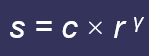

Text(0.5, 1.0, 'Gamma image')

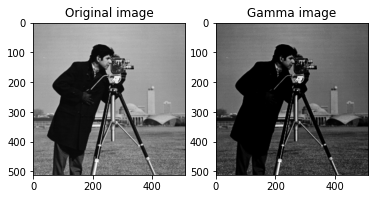

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('cameraman.tif')

r,c = img.shape
I=img.copy()
gamma=2

for i in range(r):
  for j in range(c):
# normalize the value first by 255 and denormalize it by diving it by 255 so when we enter value more then 255 error will not come
    img[i,j] = 255*((img[i,j]/255)**gamma)

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Gamma image')




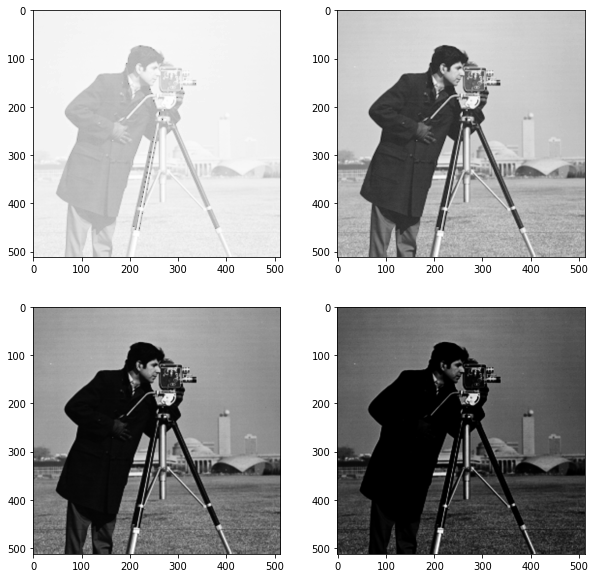

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('cameraman.tif')
i=1
plt.figure(figsize=(10,10))

for gamma in [0.1,0.5,1.1,2.2]:
  output = np.array(((img/255)**gamma)*255,dtype='uint8')
  plt.subplot(2,2,i)
  plt.imshow(output,cmap='gray')
  i=i+1
# when gamma is less than 1, images are become lighter,
# when gamma is 1  image is as it is
# when gamma is greater than 1 the image become darker.


Students have to comment on the enhancement results obtained for gamma less than 1 and gamma > 1

# Thresholding

Thresholding: is simplest method of segmentation in order to isolate the object from the background <br>



#Equation to implement thresholding
 s=L-1 for r > threshold<br>
and s= 0 for r < threshold

Enter Threshold=128


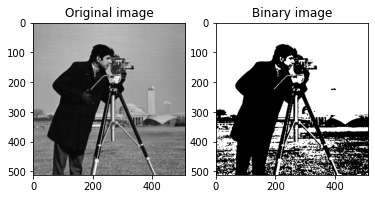

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('cameraman.tif')

r,c = img.shape
I=img.copy()
T=int(input('Enter Threshold='))

for i in range(r):
  for j in range(c):
    if img[i,j] <= T:
      img[i,j]=0
    else:
      img[i,j]=255

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Binary image')
imgt = img.copy()

In [ ]:
print('Original image size =', I.shape)
print('Binary image size =', img.shape)

Original image size = (512, 512)
Binary image size = (512, 512)


In [ ]:
io.imsave('binary.tif',img)

# Contrast stretching using Piecewise-Linear Transformation Functions<br>

Concept:<br>
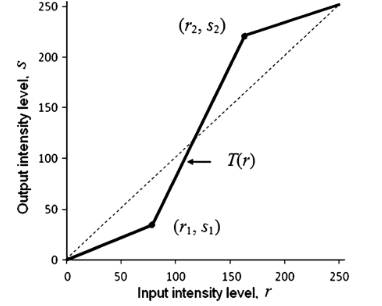

With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels <br>
Contrast stretching decreases the intensity of the dark pixels and increases the intensity of the light pixels. <br>
If r1 = s1 = 0 and r2 = s2 = L-1, the function becomes a straight dotted line in the graph (which gives no effect).

# Equation for contrast Stretching to be implemented

$Slope 1 = (s1-0)/(r1-0)$<br>
$Slope 2 = (s2-s1)/(r2-r1)$<br>
$Slope 3 = (255-s2)/(255-r2)$<br>

$Input pixel = r$ <br>
$Output pixel, S $<br>

S = Slope1.r,                 0 $\le$ r $\le$ r1<br>
  = Slope 2.(r-r1)+s1,        r1$\le$r$\le$r2<br>
  = Slope3 (r-r2)+s2,         r2$\le$r$\le$L-1  



Text(0.5, 1.0, 'Contrast stretched image')

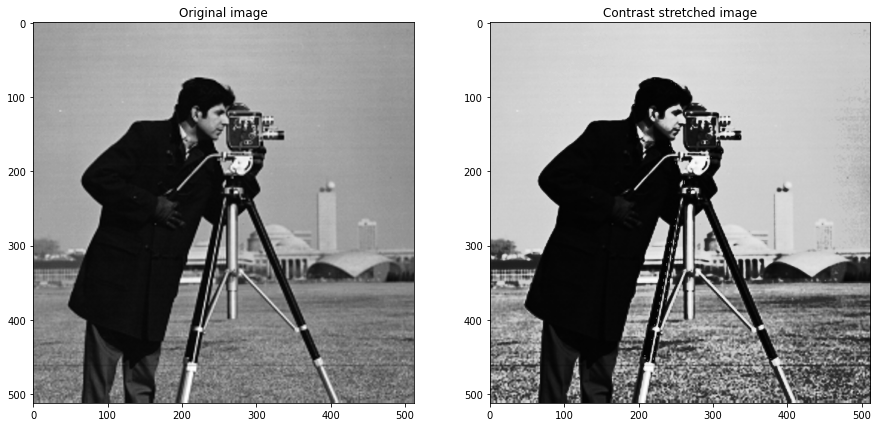

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
#input
img= io.imread('cameraman.tif')
r1= 100
r2 = 150
s1 = 50
s2 = 200
#calculation
slope1 = s1/r1
slope2 = (s2-s1)/(r2-r1)
slope3 = (255-s2)/(255-r2)
#processing for contrast stretching
I= img.copy()
r,c = img.shape
for i in range(r):
  for j in range(c):
    if 0<img[i,j]<=r1:
      img[i,j]= slope1*img[i,j]
    elif r1<img[i,j]<=r2:
      img[i,j]=slope2*(img[i,j]-r1)+s1
    else:
      img[i,j] = slope3*(img[i,j]-r2)+s2

#plot
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('Original image')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Contrast stretched image')



Text(0.5, 1.0, 'Contrast stretced image')

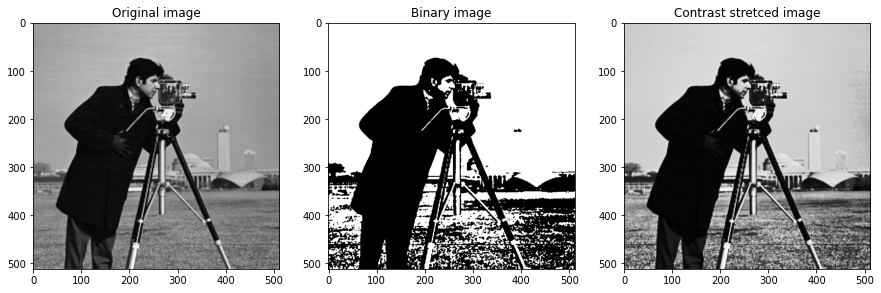

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(I,cmap='gray')
plt.title('Original image')
plt.subplot(132)
plt.imshow(imgt,cmap='gray')
plt.title('Binary image')
plt.subplot(133)
plt.imshow(img,cmap='gray')
plt.title('Contrast stretced image')

Comment on the comparison and performance of both the techniques.

# Conclusion

We implemented the code for image enhancement in spatial domain for
1. contrast image
2. thresholding
3. contrast stretching

We use gamma correction to darken a bleached image by using gamma > 1 while a dark image is brightened with gamma < 1.

It was observed that gamma correction is used to darken a bleached image.

It was observed that thresholding is used to convert a grayscale to binary image.

Contrast stretching is used to adjust contrast( Improving the discrimation bt different gray shades) by selceting s1,s2,r1 and r2.